In [27]:
import tensorflow as tf

# 1. Fashion MNIST 데이터셋 불러오기\
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from PIL import Image

In [7]:
def img_show(img):
    pil_img = Image.fromarray(np.int8(img))
    pil_img.show()
    
img = train_images[0]
label = train_labels[0]
print(label)

9


In [8]:
print(img.shape)

(28, 28)


In [9]:
# 28,28이기 때문에 별도의 reshape 과정이 필요하지 않다.

In [10]:
img_show(img)

In [11]:
# t-shirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankel boot

In [12]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

In [13]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def identity_function(x):
    return x

def softmax(x):
    x = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    
    return y
    

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [14]:
x = test_images

In [15]:
t = test_labels

In [16]:
network = init_network()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_weight.pkl'

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

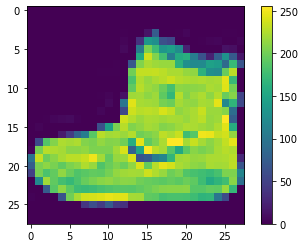

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

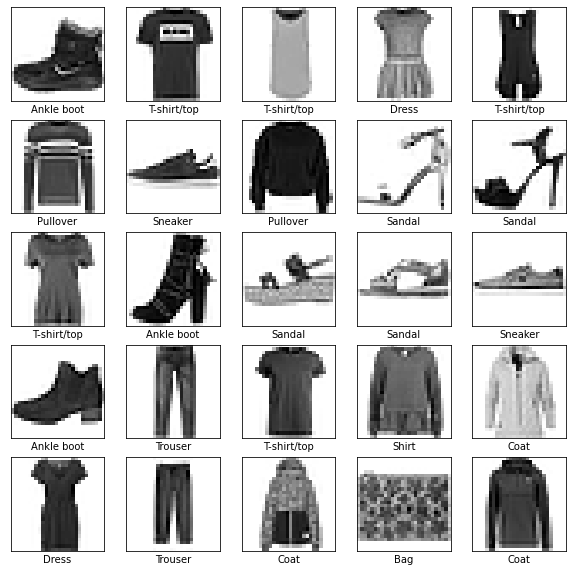

In [28]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [30]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4999 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3290 - accuracy: 0.8842 - 322ms/epoch - 1ms/step

Test accuracy: 0.8841999769210815


In [35]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [36]:
predictions = probability_model.predict(test_images)

In [37]:
predictions[0]

array([5.2958620e-11, 3.9217199e-10, 2.0235463e-11, 1.8553864e-09,
       3.6314195e-11, 1.8075657e-04, 4.6964244e-10, 7.8678802e-03,
       6.3064692e-11, 9.9195135e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

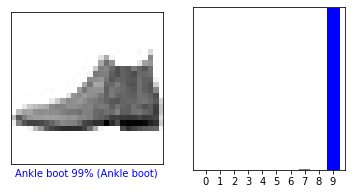

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

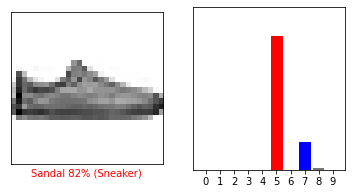

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

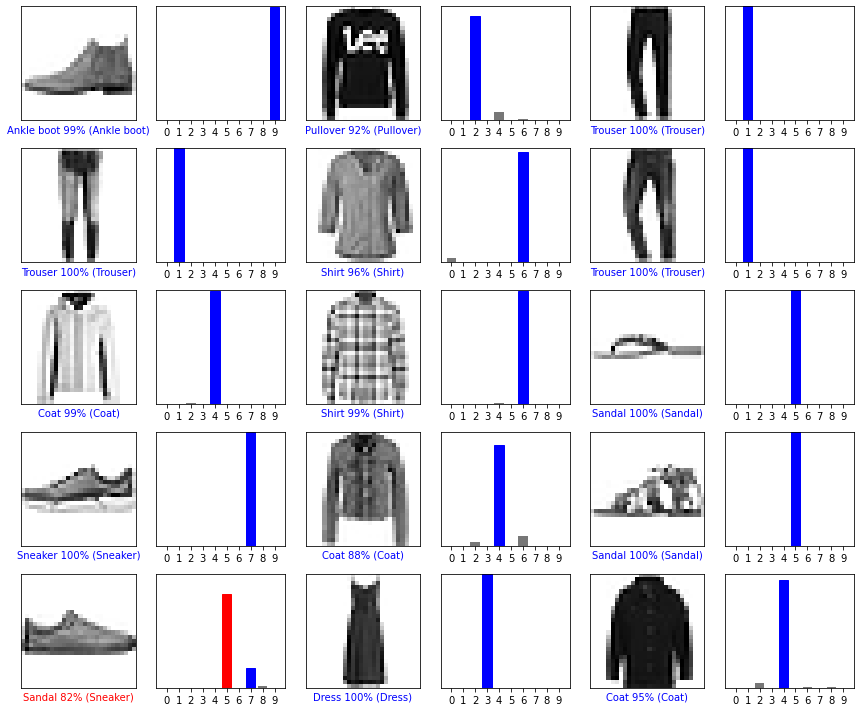

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [36]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(train_images, train_labels),(test_images, test_labels) = \
    load_mnist(flatten = True, normalize = False)

In [89]:
class_names1 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [38]:
train_images.shape
img = test_images[0]
img = img.reshape(28, 28)

In [40]:

print(train_images[0].shape)
print(train_images[1].shape)
print(train_images[2].shape)
print(train_images[32344].shape)

new_train_images = np.array([])

for i in range (0,60000):
    n_train_images = train_images[i].reshape(28, 28)
    new_train_images = np.append([n_train_images])



new_train_images.shape

(784,)
(784,)
(784,)
(784,)


TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

<function matplotlib.pyplot.show(close=None, block=None)>

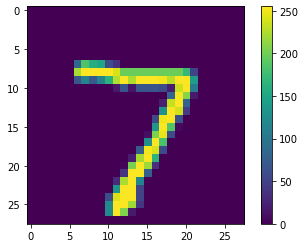

In [41]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show

In [42]:
train_images = train_images / 255.0
test_images = test_images / 255.0

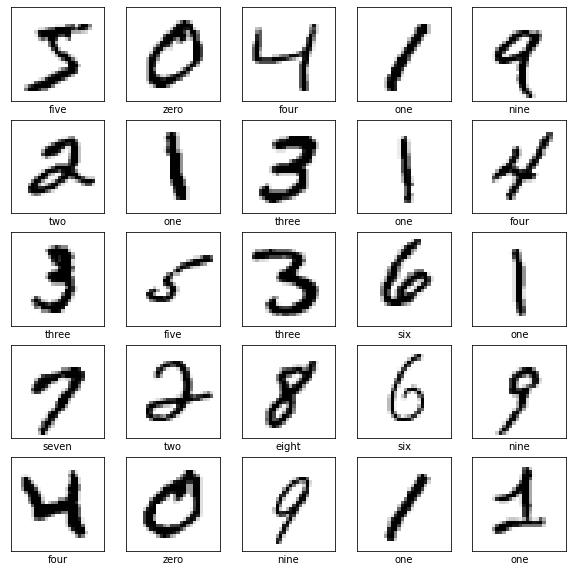

In [43]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [44]:
 model = tf.keras.Sequential([
     tf.keras.layers.Dense(128, activation = 'relu'),
     tf.keras.layers.Dense(10)
 ])

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.fit(train_images, train_labels, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1159 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0803 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0201 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.0793 - accuracy: 0.9784 - 393ms/epoch - 1ms/step


In [51]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [52]:
predictions[0]

array([3.2503042e-10, 4.6634642e-13, 2.6140165e-07, 6.7242559e-06,
       8.0865177e-17, 1.2738696e-10, 1.7851079e-17, 9.9999309e-01,
       7.5837231e-10, 4.2803112e-08], dtype=float32)

In [53]:
np.argmax(predictions[0])

7

In [69]:
test_labels[0]

7

In [78]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(test_imaages[0].reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

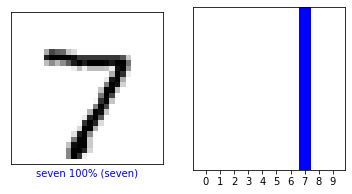

In [115]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[0].reshape(28,28),cmap = plt.cm.binary)

predicted_label = np.argmax(predictions[0])
color = 'blue'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[0])], 100 * np.max(predictions[0]), class_names[(int(test_labels[0]))]),color = color)

plt.subplot(1,2,2)
true_label = test_labels[0]
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
thisplot = plt.bar(range(10), predictions[0], color = "#777777")
plt.ylim([0,1])
predicted_label = np.argmax(predictions[0])

thisplot[predicted_label].set_color('red')
thisplot[true_label].set_color('blue')